ISCX Neural Network
=================

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import time

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers.normalization import BatchNormalization

In [22]:
from keras.utils import to_categorical


def load_data(csv_path, x_features):
    
    # read CSV
    data = pd.read_csv(csv_path, header='infer')

    # shuffle data
    data.reindex(np.random.permutation(data.index))

    # separate X and Y
    X_all = data[x_features]
    y_all = data["label"]

    # Reformat y (labels) to one-hot encoding
    y_all_cat = to_categorical(y_all)

    # get number of rows in X
    m = X_all.shape[0]

    # split dataset for train and test 2 to 1
    X_train = X_all.iloc[0:2*m//3].values
    X_test = X_all.iloc[2*m//3:m].values

    y_train = y_all_cat[0:2*m//3]
    y_test = y_all_cat[2*m//3:m]
    
    return (X_train, y_train), (X_test, y_test)



Test 1
-------

Packet size, direction, inter-arrival times per flows

In [23]:
(X_train, y_train), (X_test, y_test) = load_data(
    "csv/iscx_processed_005b.csv",
    ("%s_%03d" % (p, i) for p in ("p", "d", "t") for i in range(1, 31))
)

print("Data is loaded (%d entries)" % X_train.shape[0])

Data is loaded (6398 entries)


## n, f = X_train.shape
_, c = y_train.shape

#reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#create model
model = Sequential()

#add model layers
model.add(BatchNormalization())
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(f, 1)))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(c, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


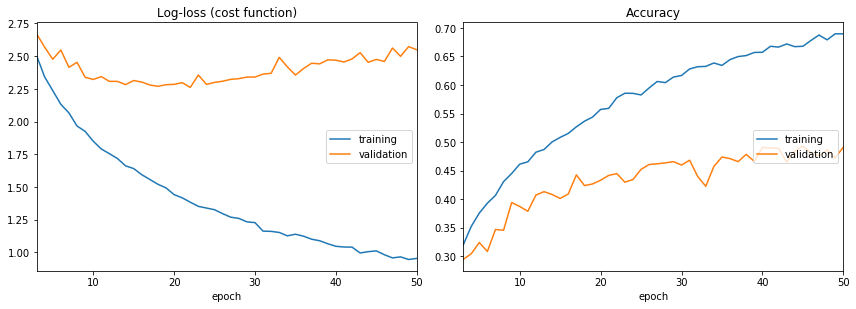

Log-loss (cost function):
training   (min:    0.945, max:    3.183, cur:    0.954)
validation (min:    2.261, max:    3.061, cur:    2.548)

Accuracy:
training   (min:    0.161, max:    0.690, cur:    0.689)
validation (min:    0.159, max:    0.493, cur:    0.491)


In [20]:
from livelossplot import PlotLossesKeras

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[PlotLossesKeras()])


Dense FFN
----------------------

In [ ]:
#create model
model = Sequential()

#add model layers
model.add(BatchNormalization())
model.add(Dense(20, activation='softmax', input_shape=(X_train.shape[1])))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])